In [ ]:
# Базовые библиотеки
import numpy as np
import pandas as pd

# Библиотеки sklearn для данных, моделей, разбиения и метрик
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    classification_report,
    RocCurveDisplay,
    PrecisionRecallDisplay,
    brier_score_loss,
)

# Для калибровки
from sklearn.calibration import CalibratedClassifierCV

In [2]:
# Воспроизводимость
RANDOM_STATE = 42

In [3]:
data = pd.read_csv("S05-hw-dataset.csv")
data

,client_id,age,income,years_employed,credit_score,debt_to_income,num_credit_cards,num_late_payments,has_mortgage,has_car_loan,savings_balance,checking_balance,region_risk_score,phone_calls_to_support_last_3m,active_loans,customer_tenure_years,default
0,1,25,94074,22,839,0.547339,1,7,0,0,26057,5229,0.080052,19,1,8,0
1,2,58,51884,26,565,0.290882,1,1,0,1,16221,11595,0.428311,15,0,7,0
2,3,53,48656,39,561,0.522340,1,13,0,0,55448,-2947,0.770883,15,4,5,0
3,4,42,81492,30,582,0.709123,2,10,1,1,35188,17727,0.357619,0,2,7,1
4,5,42,94713,8,642,0.793392,3,3,0,0,0,-404,0.414260,17,1,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2996,51,131729,6,687,0.283093,3,1,1,0,13136,14209,0.251680,19,3,2,0
2996,2997,35,54454,36,634,0.396180,5,5,0,0,0,10858,0.506146,2,2,12,0
2997,2998,38,63305,16,573,0.577888,2,13,0,1,24870,6689,0.366375,16,2,10,1
2998,2999,42,55606,33,689,0.659278,6,9,1,0,32677,3252,0.295284,16,2,8,1


In [ ]:
data.info()

In [ ]:
data.describe()

In [6]:
X = data.drop(columns=['default', 'client_id'])
y = data['default']

print("Форма X:", X.shape)
print("Форма y:", y.shape)
print(f"Названия признаков: {list(X.columns)[:5]}...")  # первые 5

display(X.head())

y.value_counts(normalize=True).to_frame()

Форма X: (3000, 15)
Форма y: (3000,)
Названия признаков: ['age', 'income', 'years_employed', 'credit_score', 'debt_to_income']...


,age,income,years_employed,credit_score,debt_to_income,num_credit_cards,num_late_payments,has_mortgage,has_car_loan,savings_balance,checking_balance,region_risk_score,phone_calls_to_support_last_3m,active_loans,customer_tenure_years
0,25,94074,22,839,0.547339,1,7,0,0,26057,5229,0.080052,19,1,8
1,58,51884,26,565,0.290882,1,1,0,1,16221,11595,0.428311,15,0,7
2,53,48656,39,561,0.522340,1,13,0,0,55448,-2947,0.770883,15,4,5
3,42,81492,30,582,0.709123,2,10,1,1,35188,17727,0.357619,0,2,7
4,42,94713,8,642,0.793392,3,3,0,0,0,-404,0.414260,17,1,10


,proportion
default,
0,0.589667
1,0.410333


In [7]:
# 1. Отделяем тестовую выборку (например, 20% данных)
X_temp, X_test, y_temp, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    stratify=y,          # важно для классификации: сохраняем долю классов
    random_state=RANDOM_STATE,
)

# 2. Делим оставшиеся данные на train и validation (например, 60/20)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp,
    y_temp,
    test_size=0.25,      # 0.25 от X_temp = 0.25 * 0.8 = 0.2 от исходных
    stratify=y_temp,
    random_state=RANDOM_STATE,
)

print("Размеры выборок:")
print("  train:", X_train.shape)
print("  val:  ", X_val.shape)
print("  test: ", X_test.shape)

print("\nРаспределение классов (train):")
print(y_train.value_counts(normalize=True))

print("\nРаспределение классов (val):")
print(y_val.value_counts(normalize=True))

print("\nРаспределение классов (test):")
print(y_test.value_counts(normalize=True))

Размеры выборок:
  train: (1800, 15)
  val:   (600, 15)
  test:  (600, 15)

Распределение классов (train):
default
0    0.589444
1    0.410556
Name: proportion, dtype: float64

Распределение классов (val):
default
0    0.59
1    0.41
Name: proportion, dtype: float64

Распределение классов (test):
default
0    0.59
1    0.41
Name: proportion, dtype: float64


In [8]:
# Бейзлайн-модель: ничего "умного", просто предсказываем самый частый класс (или случайно)
baseline = DummyClassifier(strategy="most_frequent", random_state=RANDOM_STATE)

# Обучаем только на train
baseline.fit(X_train, y_train)

# Оцениваем на validation
y_val_pred_baseline = baseline.predict(X_val)
y_val_proba_baseline = baseline.predict_proba(X_val)[:, 1]

print("=== Бейзлайн (DummyClassifier, most_frequent) – качество на validation ===")
print("Accuracy :", accuracy_score(y_val, y_val_pred_baseline))
print("Precision:", precision_score(y_val, y_val_pred_baseline, zero_division=0))
print("Recall   :", recall_score(y_val, y_val_pred_baseline, zero_division=0))
print("F1-score :", f1_score(y_val, y_val_pred_baseline, zero_division=0))

# Для ROC-AUC нам нужны вероятности положительного класса
try:
    print("ROC-AUC  :", roc_auc_score(y_val, y_val_proba_baseline))
except ValueError as e:
    print("Не удалось посчитать ROC-AUC для бейзлайна:", e)

=== Бейзлайн (DummyClassifier, most_frequent) – качество на validation ===
Accuracy : 0.59
Precision: 0.0
Recall   : 0.0
F1-score : 0.0
ROC-AUC  : 0.5


In [10]:
# Собираем Pipeline:
# 1) Масштабирование признаков (StandardScaler)
# 2) Логистическая регрессия
log_reg_pipeline = Pipeline(
    steps=[
        ("scaler", StandardScaler()),
        (
            "logreg",
            LogisticRegression(
                penalty="l2",
                C=1.0,              # сила регуляризации (чем меньше C, тем сильнее регуляризация)
                solver="liblinear", # надёжный солвер для маленьких датасетов
                random_state=RANDOM_STATE,
            ),
        ),
    ]
)

# Обучаем pipeline на train
log_reg_pipeline.fit(X_train, y_train)

# Предсказываем на validation
y_val_pred = log_reg_pipeline.predict(X_val)
y_val_proba = log_reg_pipeline.predict_proba(X_val)[:, 1]

print("=== Логистическая регрессия (C=1.0) – качество на validation ===")
print("Accuracy :", accuracy_score(y_val, y_val_pred))
print("Precision:", precision_score(y_val, y_val_pred, zero_division=0))
print("Recall   :", recall_score(y_val, y_val_pred, zero_division=0))
print("F1-score :", f1_score(y_val, y_val_pred, zero_division=0))
print("ROC-AUC  :", roc_auc_score(y_val, y_val_proba))

print("\nПодробный отчёт по классам (classification_report):")
print(classification_report(y_val, y_val_pred))

=== Логистическая регрессия (C=1.0) – качество на validation ===
Accuracy : 0.8166666666666667
Precision: 0.8505154639175257
Recall   : 0.6707317073170732
F1-score : 0.75
ROC-AUC  : 0.8746382802811079

Подробный отчёт по классам (classification_report):
              precision    recall  f1-score   support

           0       0.80      0.92      0.86       354
           1       0.85      0.67      0.75       246

    accuracy                           0.82       600
   macro avg       0.83      0.79      0.80       600
weighted avg       0.82      0.82      0.81       600



In [17]:
# Настроим сетку по параметру C (сила регуляризации)
param_grid = {
    "logreg__C": [0.01, 0.05, 0.1, 0.5, 1.0, 5.0, 10.0, 50.0, 100.0],
}

# GridSearchCV будет:
# - внутри делать кросс-валидацию по train
# - выбирать лучший C по заданной метрике (например, ROC-AUC).
grid_search = GridSearchCV(
    estimator=log_reg_pipeline,
    param_grid=param_grid,
    scoring="roc_auc",    # можно поменять на f1, recall и т.д.
    cv=5,
    n_jobs=-1,
    verbose=1,
)

grid_search.fit(X_train, y_train)

print("Лучшие параметры:", grid_search.best_params_)
print("Лучший ROC-AUC (по CV):", grid_search.best_score_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Лучшие параметры: {'logreg__C': 0.1}
Лучший ROC-AUC (по CV): 0.8535885101695057


In [18]:
# Берём лучшую найденную модель
best_model = grid_search.best_estimator_

# Оцениваем на validation
y_val_pred_best = best_model.predict(X_val)
y_val_proba_best = best_model.predict_proba(X_val)[:, 1]

print("=== Лучшая модель – качество на validation ===")
print("Accuracy :", accuracy_score(y_val, y_val_pred_best))
print("Precision:", precision_score(y_val, y_val_pred_best, zero_division=0))
print("Recall   :", recall_score(y_val, y_val_pred_best, zero_division=0))
print("F1-score :", f1_score(y_val, y_val_pred_best, zero_division=0))
print("ROC-AUC  :", roc_auc_score(y_val, y_val_proba_best))

# Оцениваем на test
y_test_pred = best_model.predict(X_test)
y_test_proba = best_model.predict_proba(X_test)[:, 1]

print("\n=== Лучшая модель – качество на test ===")
print("Accuracy :", accuracy_score(y_test, y_test_pred))
print("Precision:", precision_score(y_test, y_test_pred, zero_division=0))
print("Recall   :", recall_score(y_test, y_test_pred, zero_division=0))
print("F1-score :", f1_score(y_test, y_test_pred, zero_division=0))
print("ROC-AUC  :", roc_auc_score(y_test, y_test_proba))

print("\nClassification report (test):")
print(classification_report(y_test, y_test_pred))

=== Лучшая модель – качество на validation ===
Accuracy : 0.815
Precision: 0.8497409326424871
Recall   : 0.6666666666666666
F1-score : 0.7471526195899773
ROC-AUC  : 0.8746842129438244

=== Лучшая модель – качество на test ===
Accuracy : 0.805
Precision: 0.8056872037914692
Recall   : 0.6910569105691057
F1-score : 0.7439824945295405
ROC-AUC  : 0.8749598089201231

Classification report (test):
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       354
           1       0.81      0.69      0.74       246

    accuracy                           0.81       600
   macro avg       0.81      0.79      0.79       600
weighted avg       0.81      0.81      0.80       600



## ROC-кривая

ROC-кривая показывает, как меняется качество модели при разных порогах отсечения:

- по оси X – False Positive Rate (ложные срабатывания),
- по оси Y – True Positive Rate (чувствительность / полнота).

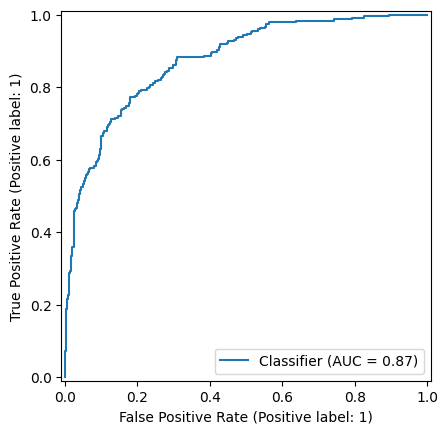

In [21]:
plot = RocCurveDisplay.from_predictions(
    y_test,
    y_test_proba,
)
plot.figure_.savefig("figures/roc_curve.png")

## PR-кривая (Precision-Recall)

PR-кривая особенно полезна при дисбалансе классов:

- по оси X – recall (полнота),
- по оси Y – precision (точность).

Здесь PR-кривая тоже почти идеальная. Это хороший повод подчеркнуть, что встроенные датасеты sklearn часто намного проще реальных данных, и в боевых задачах PR/ROC будут выглядеть гораздо скромнее.

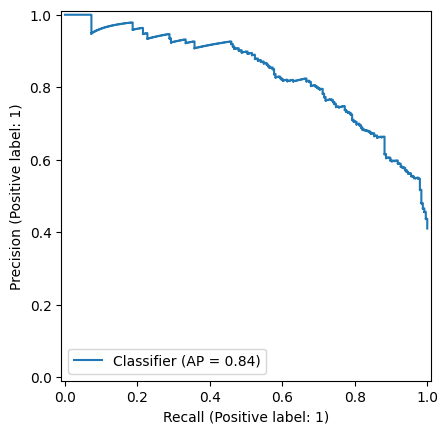

In [22]:
PrecisionRecallDisplay.from_predictions(
    y_test,
    y_test_proba,
).figure_.savefig("figures/pr_curve.png")

In [27]:
y_val_proba_base = best_model.predict_proba(X_val)[:, 1]
brier_before = brier_score_loss(y_val, y_val_proba_base)
print("Brier score до калибровки:", brier_before)

# 2. Оборачиваем тот же самый pipeline в CalibratedClassifierCV
calibrated_clf = CalibratedClassifierCV(
    estimator=best_model,
    method="sigmoid",   # Platt scaling (логистическая регрессия сверху)
    cv=5,
)

# Калибровку обучаем на тех же train-данных (внутри будет CV-разбиение)
calibrated_clf.fit(X_train, y_train)

# Смотрим Brier score после калибровки на validation
y_val_proba_cal = calibrated_clf.predict_proba(X_val)[:, 1]
brier_after = brier_score_loss(y_val, y_val_proba_cal)
print("Brier score после калибровки:", brier_after)
print("Достигнут идеал?", brier_after < brier_before, "\nНа сколько?", brier_before - brier_after)

Brier score до калибровки: 0.1386020577322306
Brier score после калибровки: 0.13857417569495237
Достигнут идеал? True 
На сколько? 2.78820372782429e-05


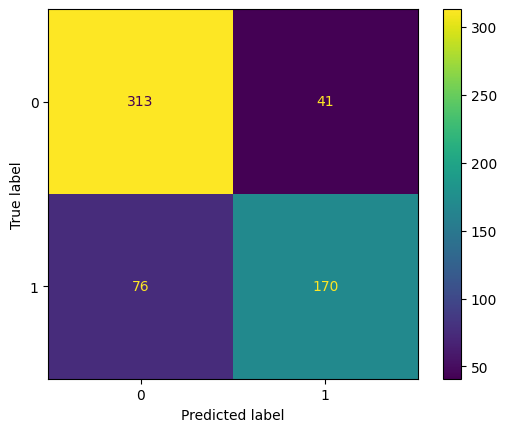

In [32]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred).figure_.savefig("figures/confusion_matrix.png")

## Выводы

В этом ноутбуке был проделан ML-эксперимент по синтетическим банковским данным.

Были достигнуты следующие результаты:

1. **Разбили данные** на train / validation / test и работали с ними по ролям.
2. Построили **бейзлайн-модель** и увидели, что нормальная модель должна быть лучше.
3. Собрали `Pipeline` с `StandardScaler` и `LogisticRegression`, обучили, посчитали метрики.
4. Через `GridSearchCV` подобрали параметр регуляризации `C`.
5. Оценили лучшую модель на **test** и построили ROC/PR-кривые.
6. Показали, как `CalibratedClassifierCV` может улучшить **калибровку вероятностей**.

В резульате достигли следующих метрик на тесте:
- ROC AUC: 0.87
- PR AUC: 0.84

Baseline:
- ROC AUC: 0.5

Данная точность лучше бейзлайна и показывает, что модель действительно научилась выделять клиентов с высоким риском дефолта по кредитам.